In [1]:
import audimg as A

/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/base/hdf5.py:40: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  import h5py.highlevel  # >= 2.8.0, https://github.com/h5py/h5py/issues/1063
/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/pydicom/__init__.py:55: DeprecationWarning: Python 2 will no longer be supported after the pydicom v1.4 release
  warnings.warn(msg, DeprecationWarning)
/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/testing/tools.py:81: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import skipif
/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/bids/grabbids/__init__.py:6: FutureWarning: grabbids has been renamed to layout in version 0.6.5, and 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
A.pl.rcParams['figure.figsize']=(12,6)

<h2>Load pre-computed per-subject and per-task results, calculate group results</h2>

In [3]:
# Load subj, task partial result files (outputs from cluster jobs)
subj_res = A.load_all_subj_res_from_parts()

# Calculate group result (ttest / wilcoxon) from within-subject classification (WSC) means
group_res=A.calc_group_results(subj_res)

/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/dartfs-hpc/rc/home/b/d70793b/.conda/envs/pymvpa/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


<h2>Group Results (N=11), Mean Clf Accuracy by Task, ROI and Cond [HD, IM]</h2>

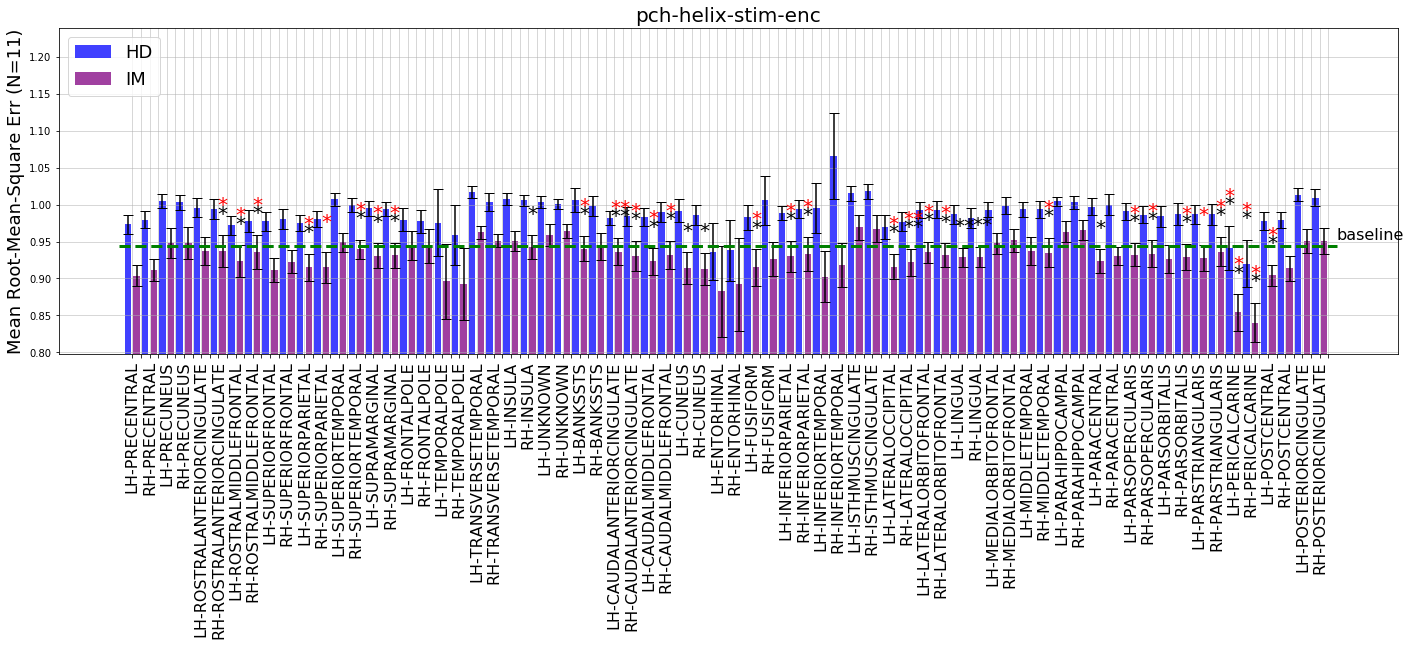

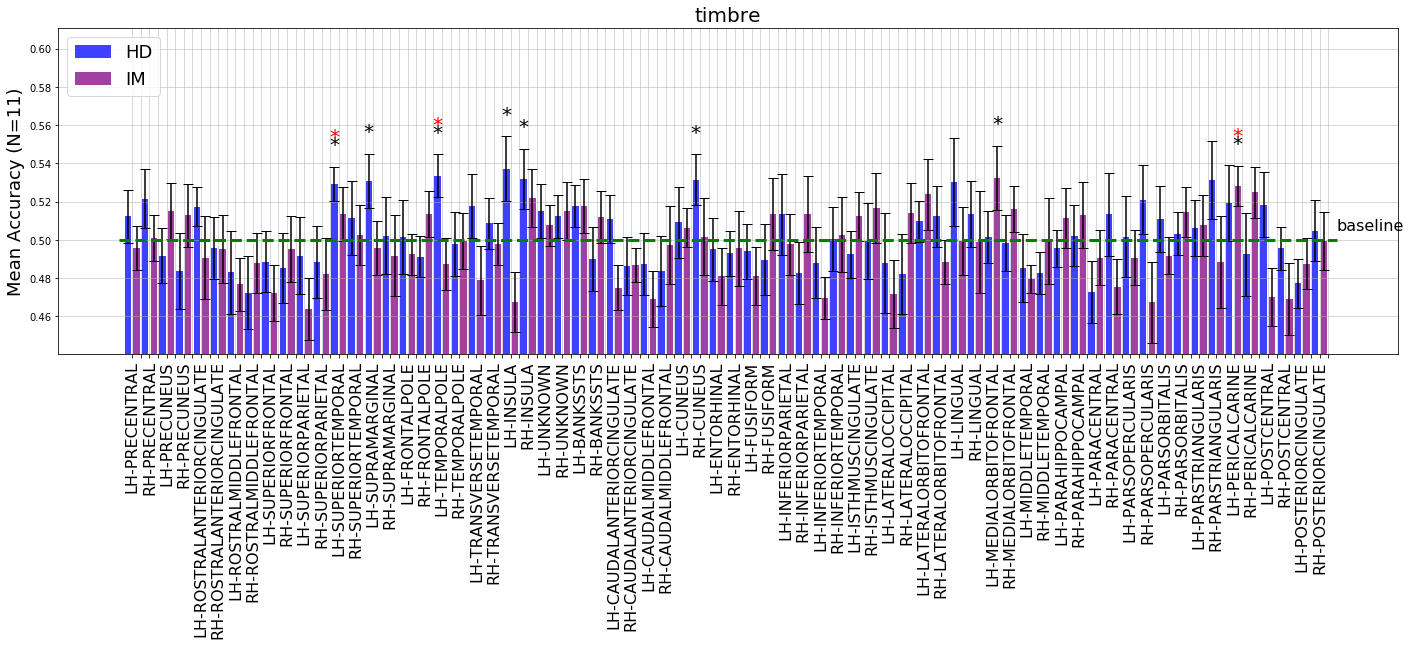

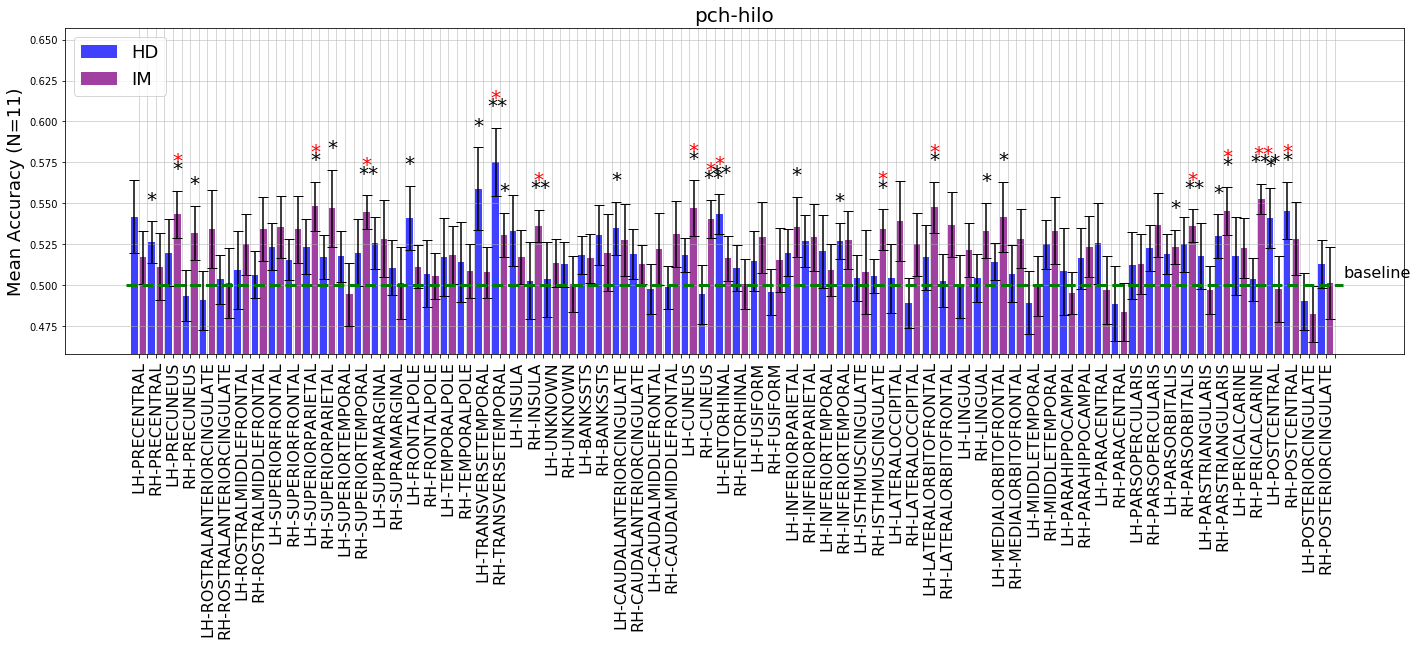

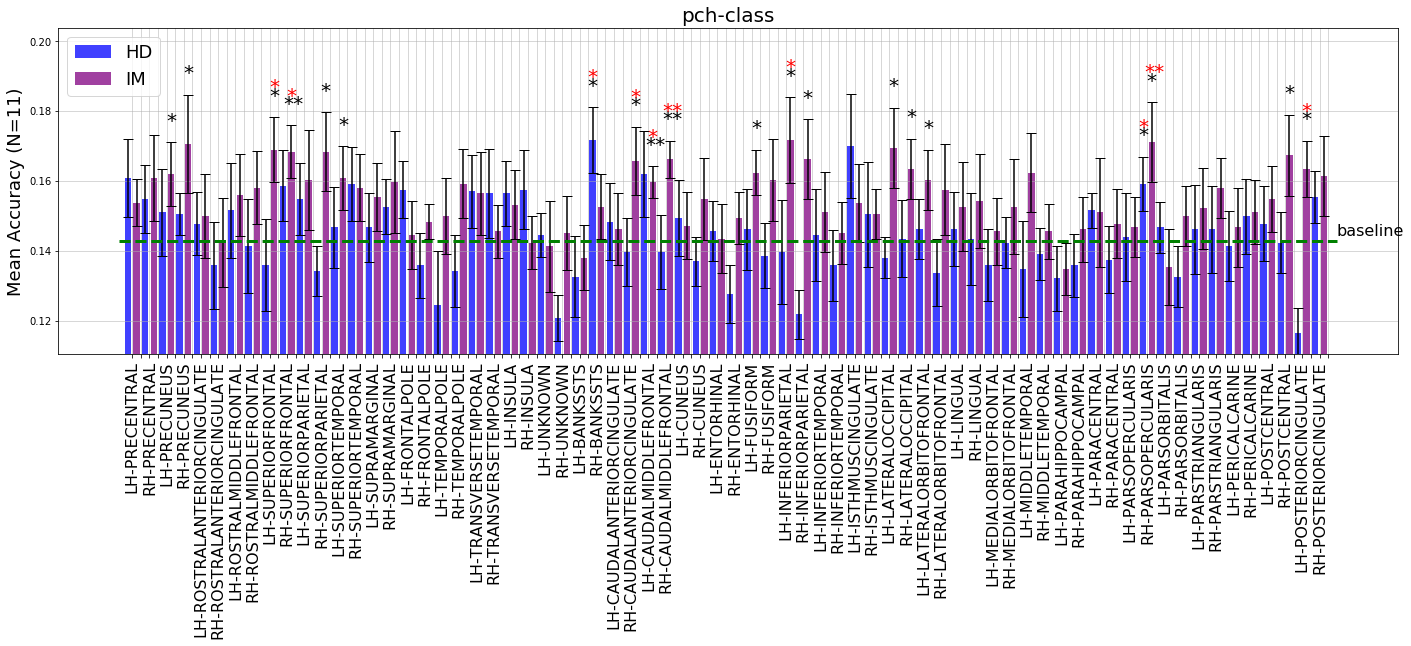

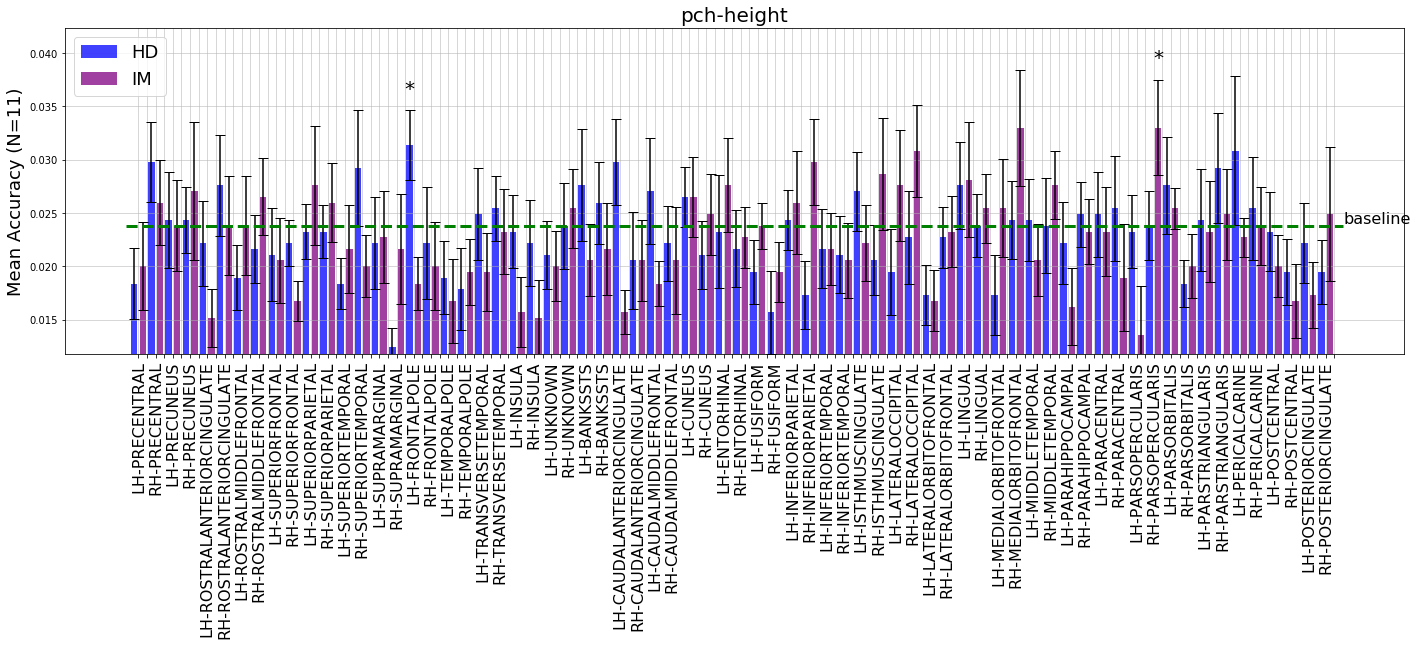

In [4]:
A.plot_group_results(group_res)

In [ ]:
# TODO: Plot individual subjects' results

In [42]:
reload(A)

<module 'audimg' from 'audimg.py'>

In [18]:
%pdb

Automatic pdb calling has been turned ON



In [39]:
a,b=subj_res[A.subjects[-1]]['pch-class'][1015]['RH']['i'][0]

In [40]:
m=A.P.ConfusionMatrix(targets=a,predictions=b)

In [41]:
print m

----------.
predictions\targets    1     3     4     6     8     9     11
            `------   ----  ----  ----  ----  ----  ----  ---- P'   N'    FP    FN   PPV NPV  TPR  SPC  FDR  MCC   F1
         1             2     6     9     11    5     4     8   45   44    43    22  0.04 0.5 0.08 0.34 0.96 -0.34 0.06
         3             4     2     1     0     2     3     1   13   44    11    22  0.15 0.5 0.08 0.67 0.85 -0.14 0.11
         4             3     7     2     2     4     6     5   29   44    27    22  0.07 0.5 0.08 0.45 0.93 -0.26 0.08
         6             9     2     9     11    9     7     5   52   26    41    13  0.21 0.5 0.46 0.24 0.79 -0.18 0.29
         8             1     1     0     0     4     2     2   10   40    6     20   0.4 0.5 0.17 0.77  0.6 -0.03 0.24
         9             1     1     2     0     0     0     0    4   48    4     24    0  0.5   0  0.86   1  -0.12   0
         11            4     5     1     0     0     2     3   15   42    12    21   0.2 0.5 0.

In [47]:
(a==b).mean(), (a==b).std()/A.np.sqrt(len(a))

(0.14285714285714285, 0.026997462357801944)

In [48]:
a.shape

(168,)